# 📈 Stock Price Prediction Using Deep Learning


## 🧺 Gathering Data and Determining Method of Data Collection and Provenance

### Data Source
For this project, we are using historical stock price data for SPY (SPDR S&P 500 ETF) sourced from [Yahoo Finance](https://ca.finance.yahoo.com/quote/SPY/history). This dataset includes the daily Open, High, Low, Close, and Volume data for SPY, which will be used to analyze and predict future stock prices.

### Method of Data Collection
The data was collected by downloading the historical stock price CSV file from Yahoo Finance. This file contains detailed historical records of SPY's trading data, providing a rich source of information for our analysis and model training.

### Provenance of the Data
The data is provided by Yahoo Finance, a reputable source known for its comprehensive and accurate financial data. Yahoo Finance compiles and disseminates this information, ensuring it is up-to-date and reliable for financial analysis.

### Problem Description
The primary objective of this project is to predict the future closing prices of SPY using deep learning techniques. By analyzing historical price trends and patterns, we aim to build a model that can provide accurate price forecasts, which can be valuable for investors and traders.

## 🔬 Identifying a Deep Learning Problem

### Problem Description
The primary deep learning problem for this project is time series forecasting, specifically predicting the future closing prices of the SPY ETF based on historical price data. Time series forecasting is crucial in finance as it helps investors and traders make informed decisions by predicting future price movements.

### Deep Learning Approach
We will employ various deep learning models to tackle this problem, focusing on model building, evaluation, and comparison. The models we plan to use include:

1. **Recurrent Neural Networks (RNNs)**:
   - **Long Short-Term Memory (LSTM) Networks**: LSTMs are well-suited for time series data as they can learn long-term dependencies and patterns in the data.
   - **Gated Recurrent Units (GRUs)**: GRUs are a simpler alternative to LSTMs and can also handle long-term dependencies effectively.

2. **Convolutional Neural Networks (CNNs)**:
   - CNNs can be applied to time series data by treating the time series as a one-dimensional image. This can capture local dependencies in the data.

3. **Autoencoders**:
   - Autoencoders can be used for anomaly detection, feature extraction, and denoising in the stock price data. By compressing and then reconstructing the data, autoencoders can help in identifying underlying patterns.

### Experiment and Comparison
We will run experiments to compare the performance of different models and algorithms. This will involve:
1. **Model Training and Evaluation**: Training each model on the historical SPY data and evaluating its performance using metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE).
2. **Hyperparameter Tuning**: Optimizing the hyperparameters for each model to achieve the best performance.
3. **Model Comparison**: Comparing the results of different models to identify the best performing model for our forecasting task.

## 👨‍💻 Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

The following steps outline the process of initial data cleaning and exploratory data analysis (EDA) on the SPY dataset. This analysis will help us understand the data better and determine if any additional data collection or transformation is needed.

### Data Loading and Initial Inspection

First, we load the dataset and inspect the initial few rows to understand its structure.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('SPY.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,24.763754,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,24.939861,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,24.992702,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.256891,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.362579,531500


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7901.000000,7901.000000,7901.000000,7901.000000,7901.000000,7.901000e+03
mean,175.362019,176.398681,174.221768,175.373324,146.944576,8.422724e+07
std,113.337317,113.909483,112.725076,113.369862,119.606724,9.171462e+07
min,43.343750,43.531250,42.812500,43.406250,24.464325,5.200000e+03
25%,106.099998,106.879997,105.160004,105.989998,70.757957,1.037030e+07
50%,132.875000,133.690002,131.779999,132.830002,94.009514,6.328720e+07
75%,214.050003,214.770004,213.029999,213.740005,187.922531,1.145801e+08
max,543.150024,544.119995,540.299988,542.780029,542.780029,8.710263e+08


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Data Cleaning

Since there are no missing values in the dataset, we proceed to convert the 'Date' column to a datetime type and set it as the index.

In [7]:
df.dropna(inplace=True)

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

### Exploratory Data Analysis (EDA)

**a. Plotting the Closing Price Over Time**

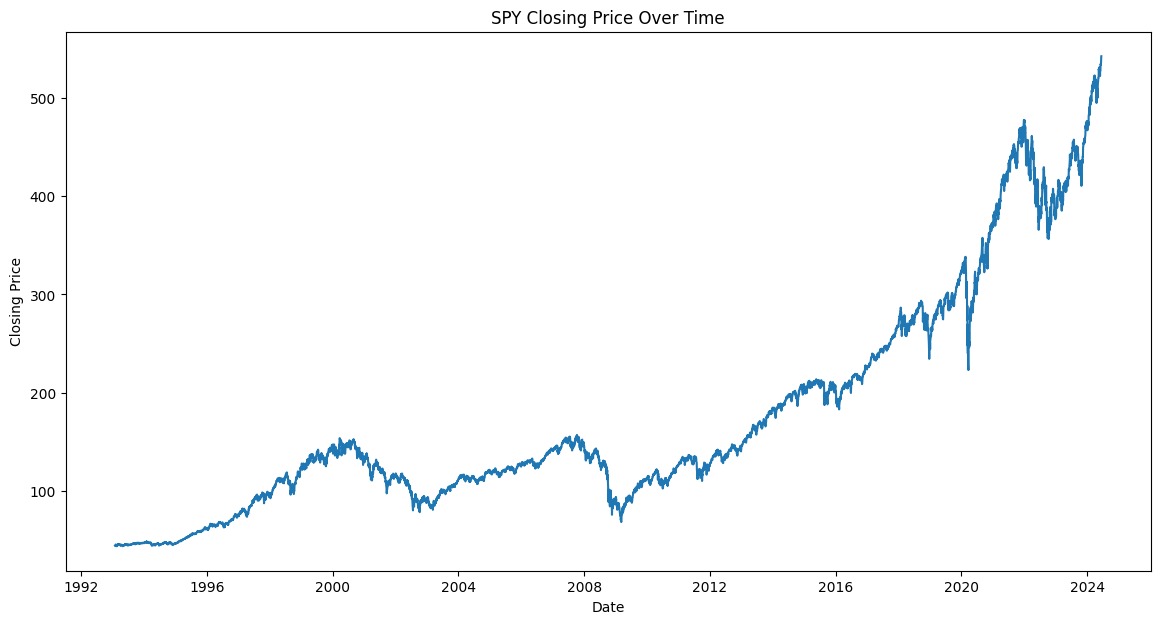

In [8]:
# Plotting the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('SPY Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

**b. Histograms for Each Feature**

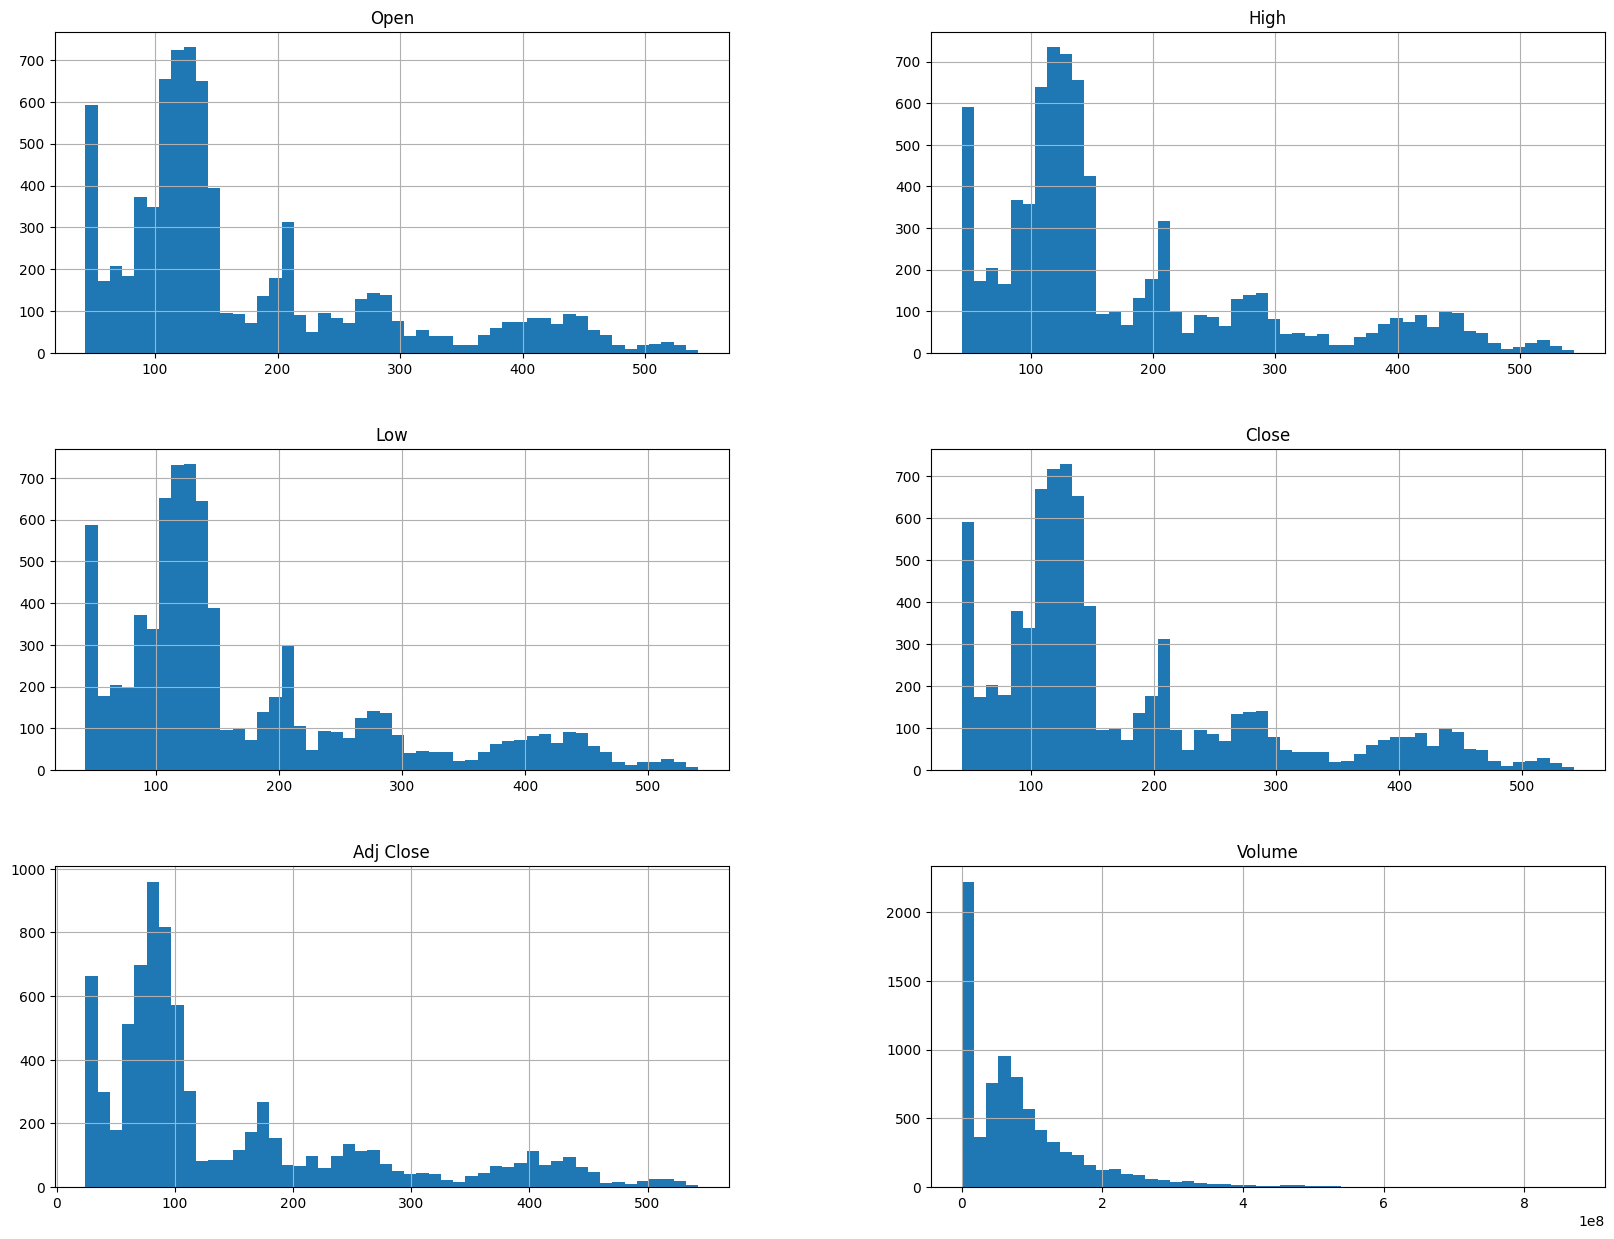

In [9]:
# Plot histograms for each feature
df.hist(bins=50, figsize=(20, 15))
plt.show()

**c. Box Plots for Each Feature**

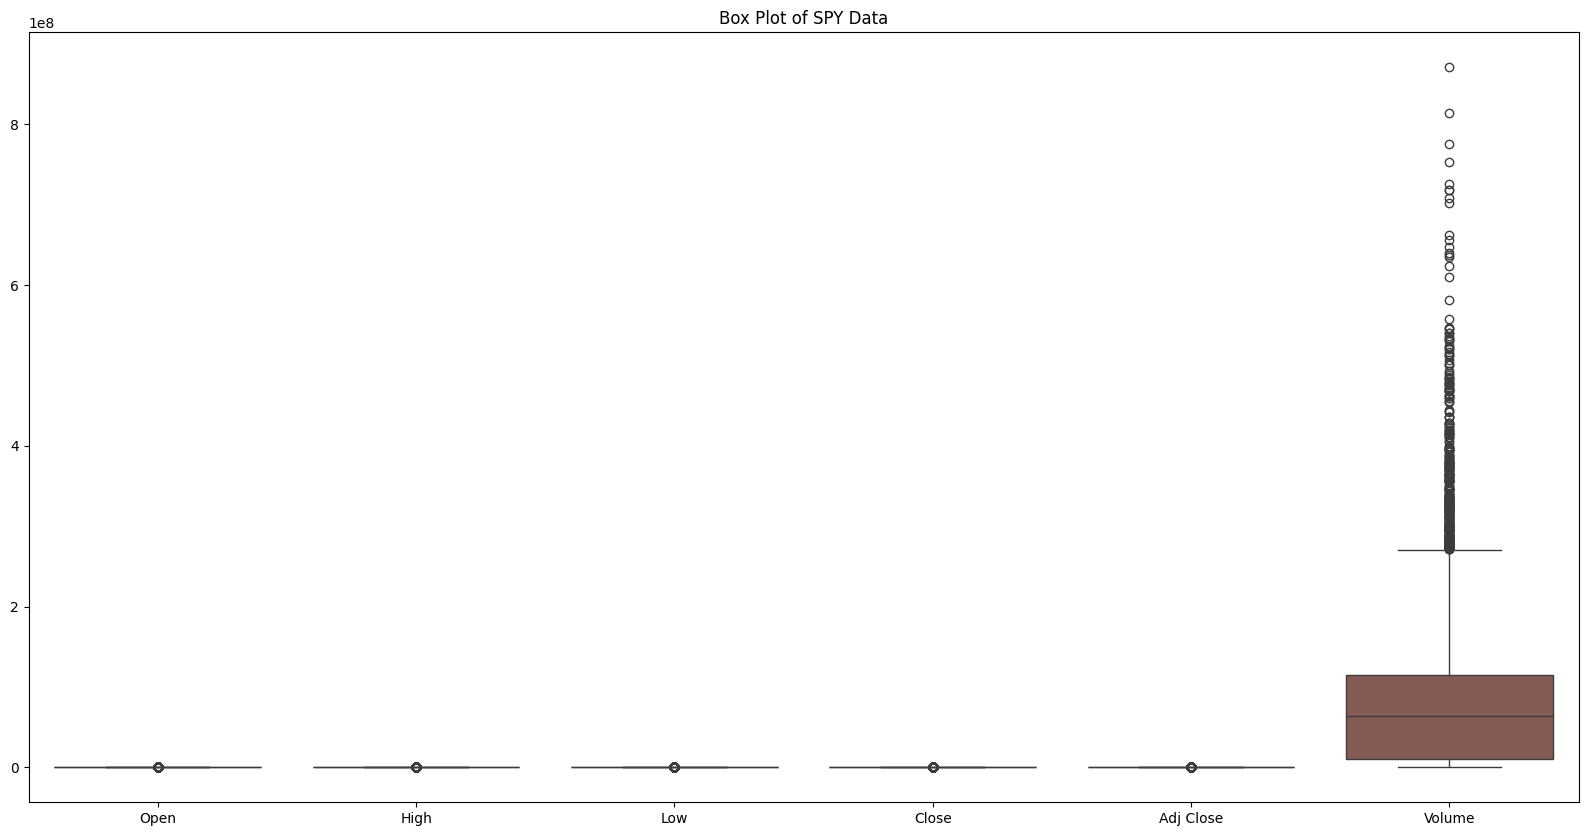

In [10]:
# Box plots for each feature
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title('Box Plot of SPY Data')
plt.show()

**d. Correlation Matrix and Heatmap**

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999944  0.999927  0.999875   0.997219  0.074116
High       0.999944  1.000000  0.999883  0.999923   0.997279  0.076454
Low        0.999927  0.999883  1.000000  0.999931   0.997277  0.070888
Close      0.999875  0.999923  0.999931  1.000000   0.997351  0.073342
Adj Close  0.997219  0.997279  0.997277  0.997351   1.000000  0.083364
Volume     0.074116  0.076454  0.070888  0.073342   0.083364  1.000000


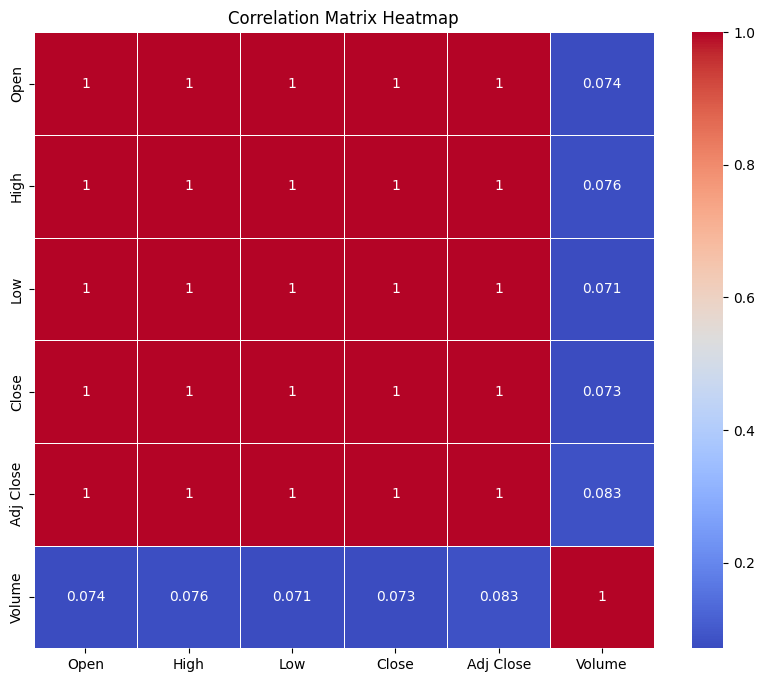

In [11]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**e. Scatter Plot Matrix**

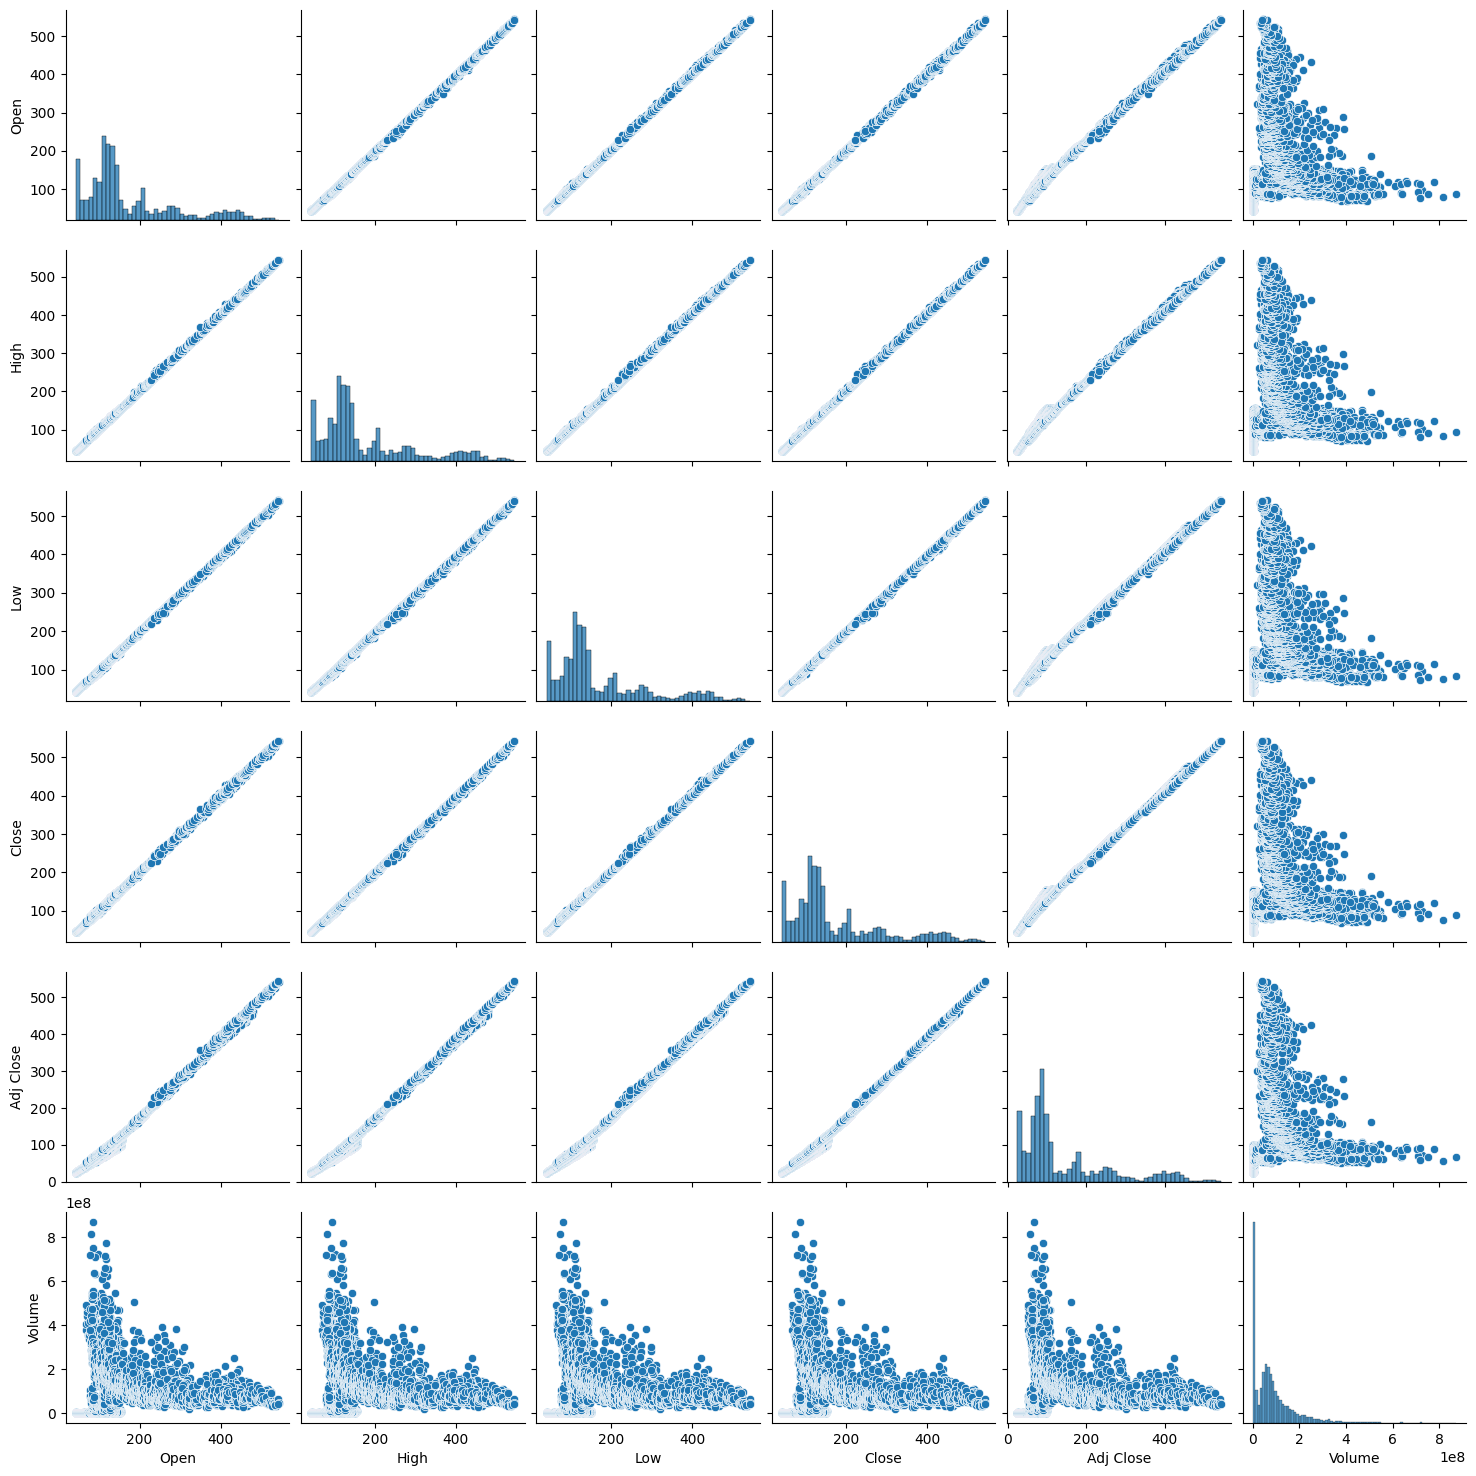

In [12]:
# Scatter plot matrix to visualize relationships between variables
sns.pairplot(df)
plt.show()

**f. Checking for Outliers in the 'Close' Column**

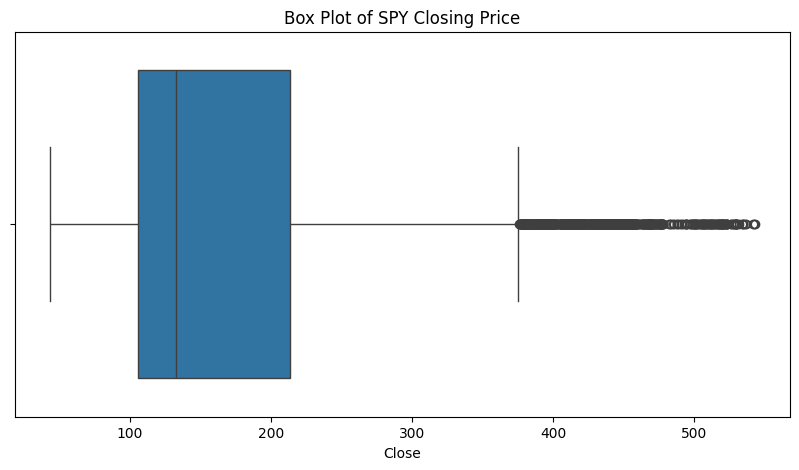

In [13]:
# Check for outliers in the 'Close' column
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Close'])
plt.title('Box Plot of SPY Closing Price')
plt.show()

### Data Transformation

**a. Normalizing the 'Close' Price**

In [14]:
# Normalize the 'Close' price
df['Close_Normalized'] = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())

**b. Log Transforming the 'Close' Price**

In [15]:
# Log transform the 'Close' price (if needed)
df['Close_Log'] = np.log(df['Close'])

**c. Plotting the Normalized and Log Transformed Closing Prices**

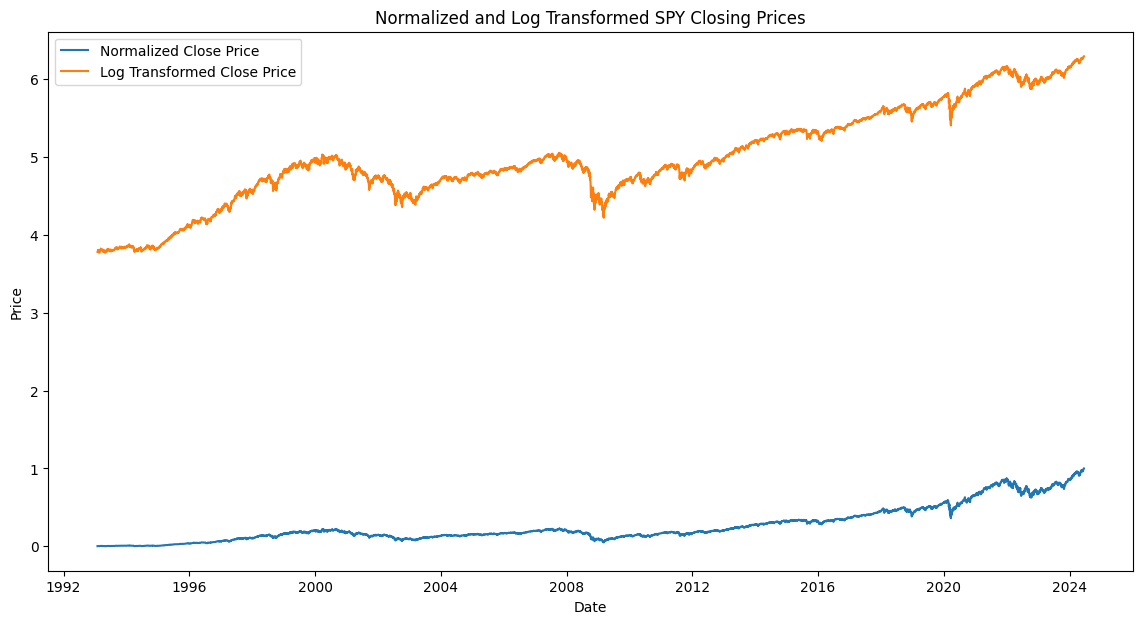

In [16]:
# Plotting the normalized and log-transformed closing prices
plt.figure(figsize=(14, 7))
plt.plot(df['Close_Normalized'], label='Normalized Close Price')
plt.plot(df['Close_Log'], label='Log Transformed Close Price')
plt.title('Normalized and Log Transformed SPY Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Summary of Findings

1. **Factors/Components of the Dataset**:
   - The dataset contains the following features: Date, Open, High, Low, Close, Adj Close, and Volume.
   - The primary focus is on the 'Close' price for forecasting purposes.

2. **Data Distribution**:
   - The histograms show the distribution of each feature. Most features have a right-skewed distribution.
   - Box plots indicate the presence of outliers, particularly in the 'Volume' column.

3. **Correlation**:
   - The correlation matrix shows a high correlation between the Open, High, Low, Close, and Adj Close prices, which is expected as they are all related to stock prices on the same day.
   - Volume has a relatively lower correlation with the price features.

4. **Data Transformation**:
   - Normalization and log transformation of the 'Close' price were performed to handle the skewed distribution and potential heteroscedasticity.

5. **Outliers**:
   - Outliers were detected primarily in the 'Volume' column.

6. **Missing Values**:
   - There were no missing values in the dataset.

Based on this initial analysis, the data is ready for modeling. However, if needed, additional data can be collected to improve the model's performance. For effective time series forecasting, we will proceed with model building using deep learning techniques.